# Part II - Ford GoBike Investigation
## by Bader Altowaim





## Investigation Overview

> In this project I will investigate the Ford GoBike System dataset <br/>
I will be looking for trends in the dataset and the majority of the users by what type the are and what gender <br/>
> **Key insights**
> - The ride are usually between 3 - 12 minutes
> - Males are the majority of the users with 74.3%
> - Subscribers have higher ride duration



## Dataset Overview

> Dataset used **Ford GoBike System Data** provided by udacity <br/>
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area <br/>
> The dataset contains 83989 rows and 16 columns

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

## (Visualization 1)

> Fisrt Visualization it shows the duration of the bike rides in second and how many there are rides with that duration <br/>
> With the plot we can see that the users mostly rent the bikes from 3 minutes to 12 minutes

In [3]:
# function to plot histigram
def plot_hist(df,x,bin, quant_max, quant_min):
    # df for the data frame
    # x the value for x that we are ploting
    # bin to create the bins for the plot
    # quant_max to set the quantile for the maximum bin
    # quant_min to set the quantile for the minimum bin
    
    # create the bins, quantile with max and min quantile to remove outliers
    bins = np.arange(df[x].quantile(q=quant_min), df[x].quantile(q=quant_max) + bin, bin)
    

    plt.figure(figsize=(15,5))
    plt.hist(x, data=df, bins=bins)
    plt.title(f'{x} Distribution', weight=('bold'))
    plt.ylabel('Count', weight=('bold'))
    plt.xlabel(x, weight=('bold'))

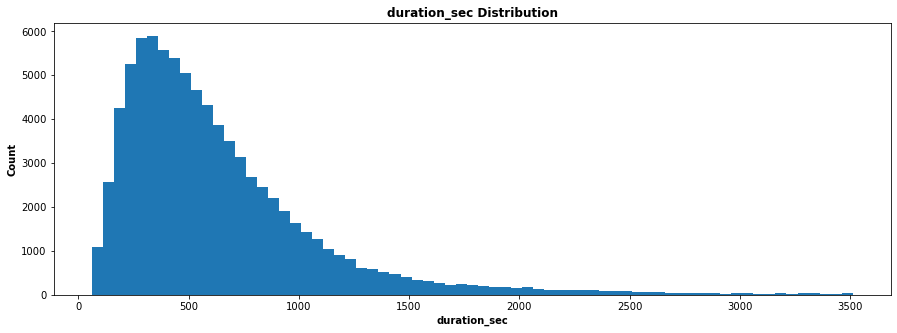

In [4]:
plot_hist(df,'duration_sec', 50, 0.99, 0.0)

## (Visualization 2)

> Second Visualization it shows the percentage of genders of the bike rides <br/>
> With the plot we can see that our customers mostly are males with 74.3% and 23.6% for females

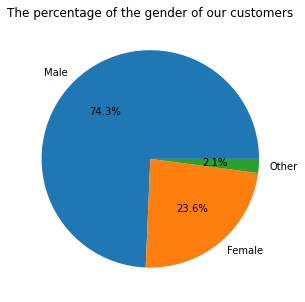

In [5]:
count = df.member_gender.value_counts()


plt.figure(figsize=(15,5))
plt.pie(count, labels=count.index, autopct='%1.1f%%')
plt.title('The percentage of the gender of our customers');

## (Visualization 3)

> Third Visualization it shows the duration in seconds of the bike riders based on the user type <br/>
> We have two plots the first one shows that customers usually have higher duration, but after dividing the user types into their genders we found that the subscribers are actualy have higher duration


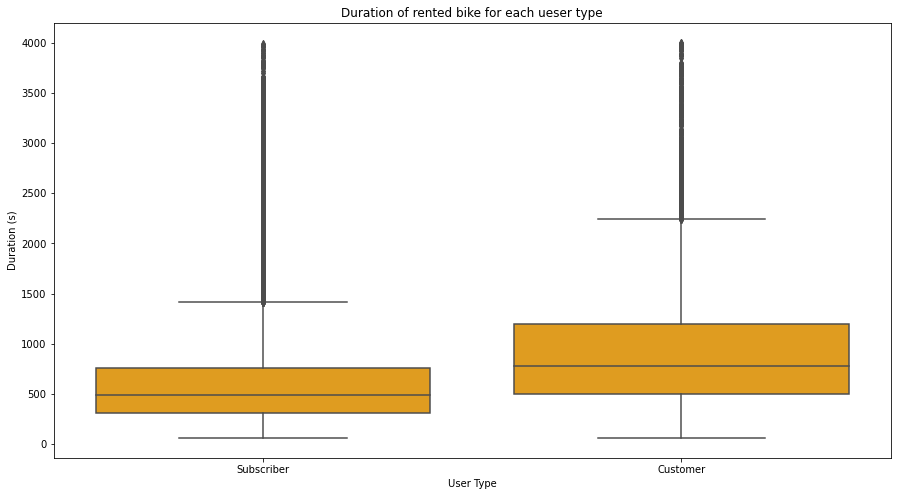

In [6]:
plt.figure(figsize=(15,8))
sb.boxplot(data=df.query('duration_sec <= 4000'),x='user_type',y='duration_sec', color='orange')
plt.title('Duration of rented bike for each ueser type')
plt.xlabel('User Type')
plt.ylabel('Duration (s)');

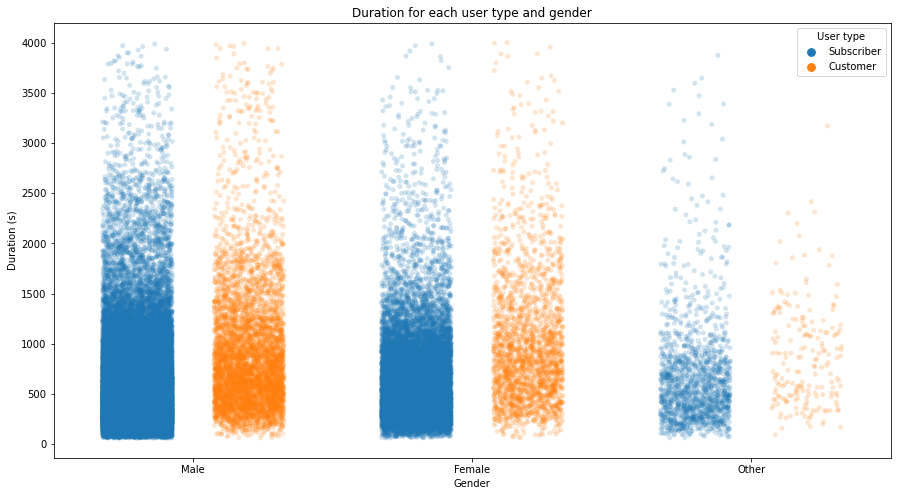

In [7]:
plt.figure(figsize=(15,8))
sb.stripplot(data=df.query('duration_sec <= 4000'),x='member_gender', y='duration_sec', 
             hue='user_type', dodge=True, jitter=0.25, alpha=.2)
plt.legend(title = 'User type');
plt.title('Duration for each user type and gender')
plt.xlabel('Gender')
plt.ylabel('Duration (s)');

In [9]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 906655 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\bader\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\bader\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\bader\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\bader\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\bader\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    self.convert_single_notebook(notebook_